# Task №1

#1. Train 4 different classifiers using sklearn library to predict "Activity" (biological response of the molecule) field from the "bioresponse.csv" dataset:

- small decision tree;
- deep decision tree;
- random forest on small trees;
- random forest on deep trees;

#2. Calculate the following metrics to check the quality of your models:
- precision;
- recall;
- accuracy;
- F1-score;
- log-loss;

#3. Plot precision-recall and ROC curves for your models.

#4. Train a classifier who avoids Type II (False Negative) errors and calculate metrics  from p.2 for it.

In [1]:
# Importing the necessary libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
# Data import:

df = pd.read_csv("bioresponse.csv")
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


# #1 Training 4 different classifiers using sklearn library to predict "Activity":

In [9]:
# Separating data into testing and training samples

training_threshold = int(len(df) * 0.9)

x_train, y_train = df[df.columns[1:]][:training_threshold], df[df.columns[0]][:training_threshold]
x_test, y_test = df[df.columns[1:]][training_threshold:], df[df.columns[0]][training_threshold:]

In [10]:
# Training models and computing predictions:

models_names_arr = ['small_tree', 'deep_tree', 'small_rf', 'deep_rf']
models_dict, prob_pred_dict = {}, {}

i = 0
for model in [DecisionTreeClassifier, RandomForestClassifier]:
    for depth in [5, 20]:
        
        clf = model(max_depth = depth, random_state = 7)
        clf = clf.fit(x_train, y_train)
        
        model_name = models_names_arr[i]
        models_dict[model_name] = clf
        prob_pred_dict[model_name] = clf.predict_proba(x_test)[:, 1]

        i += 1

models_dict

{'small_tree': DecisionTreeClassifier(max_depth=5, random_state=7),
 'deep_tree': DecisionTreeClassifier(max_depth=20, random_state=7),
 'small_rf': RandomForestClassifier(max_depth=5, random_state=7),
 'deep_rf': RandomForestClassifier(max_depth=20, random_state=7)}

In [11]:
prob_pred_dict['real_activity'] = y_test
prob_pred_df = pd.DataFrame(prob_pred_dict)
prob_pred_df

,small_tree,deep_tree,small_rf,deep_rf,real_activity
3375,0.233666,1.000000,0.379582,0.713829,1
3376,0.937500,1.000000,0.548862,0.677257,1
3377,0.068259,0.000000,0.296212,0.183119,0
3378,0.361702,0.000000,0.642917,0.690000,1
3379,0.233666,0.102459,0.517059,0.528013,0
...,...,...,...,...,...
3746,0.745847,0.985507,0.616664,0.760004,1
3747,0.796053,0.000000,0.532831,0.554040,1
3748,0.233666,0.000000,0.381947,0.380000,0
3749,0.745847,1.000000,0.552558,0.785492,1


# #2 Calculating the metrics to check the quality of the models:

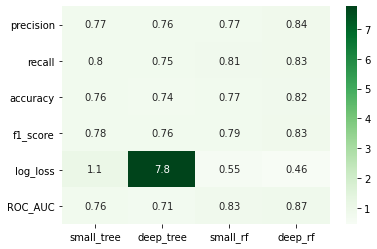

In [12]:
from collections import defaultdict

metrics_dict = defaultdict(dict)
threshold = 0.5

for name in models_names_arr:
    
    # Form predicted class
    predicted_class = (prob_pred_df[name] > threshold).astype(int)
    
    # Compute all metrics
    precision, recall, f_score, _ = metrics.precision_recall_fscore_support(prob_pred_df['real_activity'],\
                                                                            predicted_class, average = "binary")
    accuracy = metrics.accuracy_score(prob_pred_df['real_activity'], predicted_class)
    log_loss = metrics.log_loss(prob_pred_df['real_activity'], prob_pred_df[name])
    roc_auc = metrics.roc_auc_score(prob_pred_df['real_activity'], prob_pred_df[name])

    metric_name_value_pairs = zip(("precision", "recall", "accuracy", "f1_score", "log_loss", "ROC_AUC"),\
                                  (precision, recall, accuracy, f_score, log_loss, roc_auc))
    
    # Build metrics dict
    for metric_name, metric_value in metric_name_value_pairs:
        metrics_dict[name][metric_name] = metric_value

df_metrics = pd.DataFrame(metrics_dict)
sns.heatmap(df_metrics, cmap="Greens", annot=True);
